# Exploratory Data Analysis


In [239]:
from IPython.display import Image
from IPython.core.display import HTML 

In [240]:
import numpy as np
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
from shapely.geometry import Point, Polygon
import descartes

import warnings

warnings.filterwarnings("ignore")

In [241]:
pwd

'/Users/Monika/GitHub/Iowa Liquor Sales'

In [242]:
#os.chdir('../')

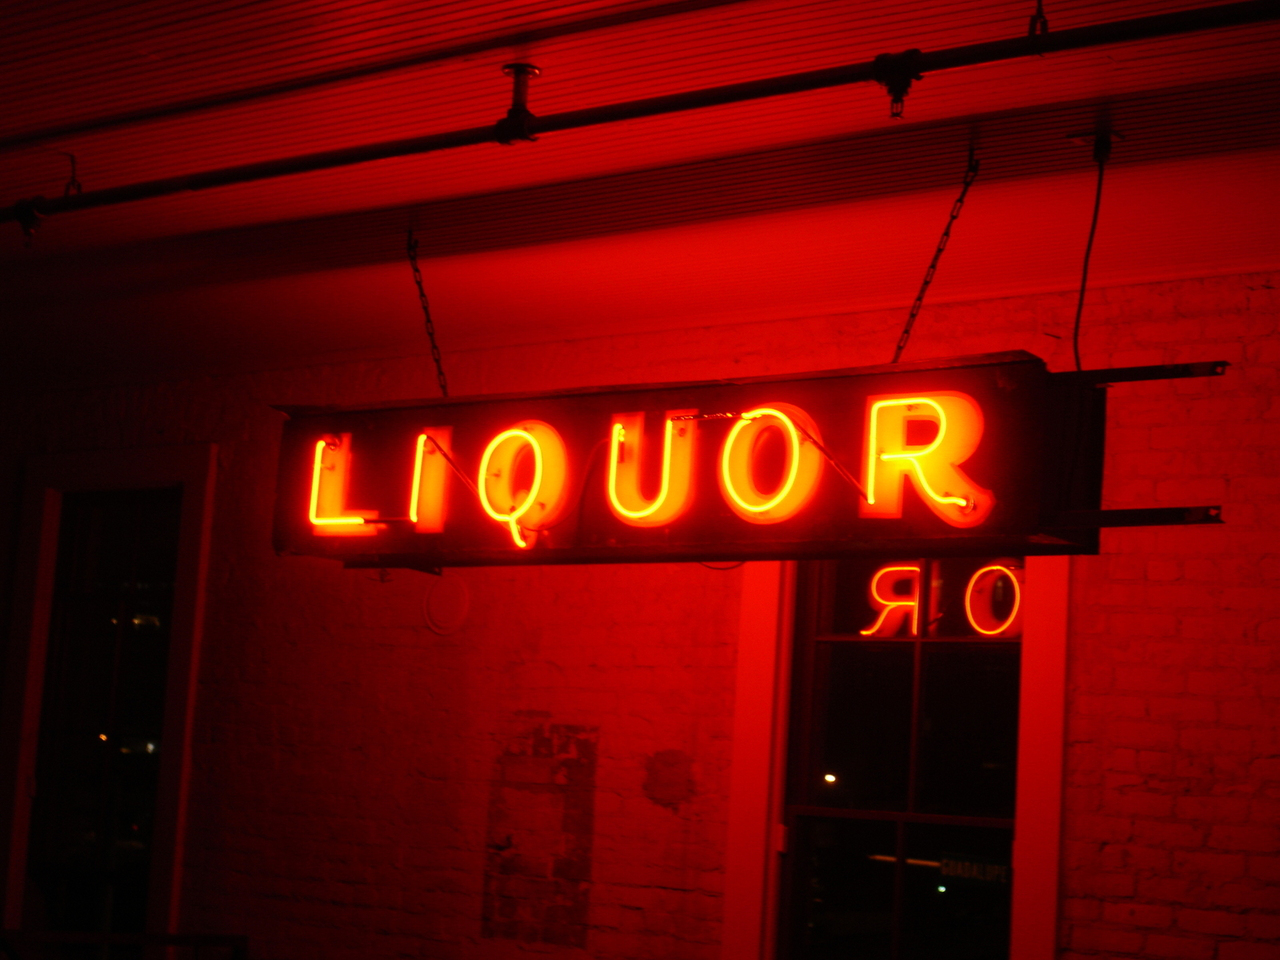

In [243]:
PATH = "/Users/Monika/GitHub/Iowa Liquor Sales/notebooks/"
Image(filename= PATH + "liquorsignsmall.png", width=700, height=700)

In [244]:
iowa_counties  = gpd.read_file('data/county/county.shp')

In [245]:
#This DataFrame contains sales data from all of the Hy-Vee stores in Iowa
df = pd.read_csv('data/Hy_vee.csv', parse_dates = ['Date'])

In [246]:
df.shape

(6458510, 24)

In [247]:
#Changing column names to lowercase
df.columns = map(str.lower, df.columns)

In [248]:
df.columns

Index(['invoice/item number', 'date', 'store number', 'store name', 'address',
       'city', 'zip code', 'store location', 'county number', 'county',
       'category', 'category name', 'vendor number', 'vendor name',
       'item number', 'item description', 'pack', 'bottle volume (ml)',
       'state bottle cost', 'state bottle retail', 'bottles sold',
       'sale (dollars)', 'volume sold (liters)', 'volume sold (gallons)'],
      dtype='object')

In [249]:
#Change county name observations to uppercase
df['county'] = df['county'].str.upper()

In [250]:
#There are Hy-Vee stores in 72 of Iowa's 99 counties
df['county'].nunique()

72

In [251]:
#Adding month and year columns
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

In [252]:
#DataFrame containing Iowa's geographical data
df_counties  = gpd.read_file('data/county/county.shp')

In [253]:
#Changing column names to lowercase
df_counties.columns = map(str.lower, df_counties.columns)

In [254]:
df_counties.columns

Index(['shape_leng', 'shape_area', 'area', 'perimeter', 'co_number', 'co_fips',
       'acres', 'fips', 'county', 'st', 'geometry'],
      dtype='object')

In [255]:
#Change county name observations to uppercase
df_counties['county'] = df_counties['county'].str.upper()

In [256]:
#Iowa has 99 counties
df_counties['county'].nunique()

99

In [257]:
#Merging Hy-Vee sales data with Iowa county dataset
df_map = pd.merge(df, df_counties, on = ['county'], how = 'left')

In [258]:
#Added columns, number of observations remained the same
df_map.shape

(6458510, 36)

In [259]:
#Number of counties correct - merge was correct
df_map['county'].nunique()

72

In [260]:
#This many stores are missing store location coordinates
df_map['store location'].isna().sum()

973639

In [261]:
#Approximately 15% of the df_map dataset is missing coordinates
df_map['store location'].isna().sum()/len(df_map)

0.1507528826308235

In [364]:
#Subsetting those stores that do not have missing coordinates
for_mapping = df_map[df_map['store location'].isna() != True]

In [383]:
#I only want to plot distinct locations
for_mapping['store location'].nunique()

168

In [365]:
#Size of dataset without missing store location coordinates
for_mapping.shape

(5484871, 37)

In [396]:
#this df only contains unique
for_mapping = pd.DataFrame({'coordinates': for_mapping['store location'].unique()})

print(len(for_mapping))
for_mapping.head()

168


,coordinates
0,POINT (-93.17114 43.14623)
1,POINT (-95.385111 40.761736)
2,POINT (-91.701581 42.030129)
3,POINT (-90.548919 41.55678100000001)
4,POINT (-92.403843 42.505197)


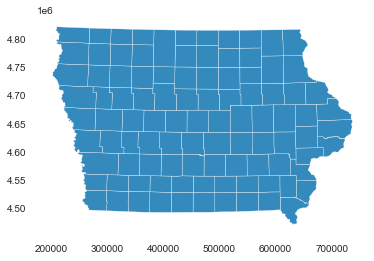

In [397]:
#Simple plot of Iowa counties
ax = df_counties.plot()

In [399]:
type(for_mapping['coordinates'][1])

str

In [400]:
for_mapping['coordinates'][1]

'POINT (-95.385111 40.761736)'

In [401]:
#These will fail if you do not get rid of nulls first
for_mapping['longitude'] = for_mapping['coordinates'].apply(lambda x: x.split(' ')[1])
for_mapping['latitude'] = for_mapping['coordinates'].apply(lambda x: x.split(' ')[2])

In [402]:
#Getting rid of the parenthesis
for_mapping['longitude'] = for_mapping['longitude'].str.replace('(','')
for_mapping['latitude'] = for_mapping['latitude'].str.replace(')','')

In [403]:
for_mapping['longitude'].head()

0     -93.17114
1    -95.385111
2    -91.701581
3    -90.548919
4    -92.403843
Name: longitude, dtype: object

In [404]:
#gdf = gpd.GeoDataFrame(
    #for_mapping, geometry=gpd.points_from_xy(for_mapping.longitude, for_mapping.latitude))

In [405]:
#could not get this plot to show
#gdf.plot(ax=ax, color='red')
#plt.show()

<Figure size 432x288 with 0 Axes>

In [406]:
#Trying a different map 
usa = gpd.read_file('data/states_21basic/states.shp')

In [408]:
iowa = usa[usa['STATE_NAME']=='Iowa']

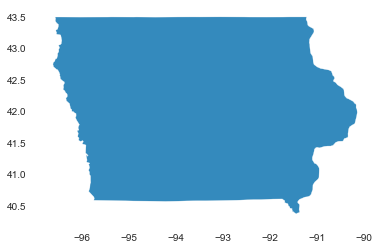

In [409]:
iowa.plot()

In [413]:
for_mapping.head()

,coordinates,longitude,latitude,geometry
0,POINT (-93.17114 43.14623),-93.17114,43.14623,POINT (-93.17114 43.14623)
1,POINT (-95.385111 40.761736),-95.385111,40.761736,POINT (-95.38511 40.76174)
2,POINT (-91.701581 42.030129),-91.701581,42.030129,POINT (-91.70158 42.03013)
3,POINT (-90.548919 41.55678100000001),-90.548919,41.55678100000001,POINT (-90.54892 41.55678)
4,POINT (-92.403843 42.505197),-92.403843,42.505197,POINT (-92.40384 42.50520)


In [415]:
gdf = gpd.GeoDataFrame(
    for_mapping, geometry='geometry')

In [418]:
#They are the correct dtype
type(for_mapping['geometry'][0])

shapely.geometry.point.Point

In [416]:
gdf.plot(ax=iowa, color='red')
plt.show()

AttributeError: 'GeoDataFrame' object has no attribute 'set_aspect'

In [269]:
#Loading unemployment insurance dataset
df_unemployment = pd.read_csv('data/Iowa_Unemployment_Insurance.csv', parse_dates = ['Month'])

In [270]:
df_unemployment.shape

(11385, 9)

In [271]:
#Changing unemployment df columns to lowercase
df_unemployment.columns = map(str.lower, df_unemployment.columns)

In [272]:
#Changing county names to uppercase
df_unemployment['county'] = df_unemployment['county'].str.upper()

In [273]:
#Number of counties is correct
df_unemployment['county'].nunique()

99

In [274]:
#No missing unemployment county data
len(df_unemployment[df_unemployment['county'].isna() == True])

0

In [277]:
#range of dates for unemployment data
print(df_unemployment['month'].min())
print(df_unemployment['month'].max())

2011-01-31 00:00:00
2020-07-31 00:00:00


In [278]:
#Creating new columns for month and year separated in unemployment set
df_unemployment['year'] = pd.DatetimeIndex(df_unemployment['month']).year
df_unemployment['month'] = pd.DatetimeIndex(df_unemployment['month']).month

In [279]:
#Subsetting only the part of unemployment insurance data of interest
dfu_subset = df_unemployment.loc[:, ['month', 'county', 'year', 'initial claims']]

In [280]:
df_map = pd.merge(df_map ,dfu_subset, on = ['month','county', 'year'], how='left')

In [281]:
#Added additional column containing intial unemployment claims
df_map.shape

(6458510, 37)

In [283]:
#Year and date data make sense
print(df_map['year'].min())
print(df_map['year'].max())
print(df_map['date'].min())
print(df_map['date'].max())

2012
2020
2012-01-03 00:00:00
2020-08-31 00:00:00


In [198]:
#Now looking in which counties the most alcohol was sold
df_temp_county = pd.DataFrame(df_map.groupby(['county'])['bottles sold'].agg('sum')).reset_index()
df_temp_county.sort_values(by='bottles sold', ascending = False).head()

,county,bottles sold
54,POLK,17755370
40,LINN,6289636
37,JOHNSON,5141238
59,SCOTT,4932032
4,BLACK HAWK,2720038


In [200]:
#City names also need to be uppercase
df_map['city'] = df_map['city'].str.upper()

In [201]:
#In which cities were the most bottles sold
df_temp_cities = pd.DataFrame(df_map.groupby(['city'])['bottles sold'].agg('sum')).reset_index()
df_temp_cities.sort_values(by='bottles sold', ascending = False).head()

,city,bottles sold
28,DES MOINES,10171114
12,CEDAR RAPIDS,5463528
26,DAVENPORT,4108716
44,IOWA CITY,3653469
85,WEST DES MOINES,3205648


In [204]:
df_map['category name'] = df_map['category name'].str.upper()

In [214]:
#Subsetting data that only contains rum sales
rum = df_map[df_map['category name'].str.contains('RUM')==True]
len(rum)

729098

In [206]:
#These are types of rum sold in Hy-Vee Stores: 8 types
rum['category name'].unique()

array(['SPICED RUM', 'PUERTO RICO & VIRGIN ISLANDS RUM', 'FLAVORED RUM',
       'JAMAICA RUM', 'BARBADOS RUM', 'WHITE RUM', 'GOLD RUM',
       'AGED DARK RUM'], dtype=object)

In [296]:
#Aggregating over total number of bottles sold
#df_timeseries = pd.DataFrame(rum.groupby(['category name'])['volume sold (liters)'].agg('sum')).reset_index()
#df_timeseries.sort_values(by='volume sold (liters)', ascending = False).head()

In [308]:
#Aggregating volume sold (liters) per year in each category
df_timeseries = pd.DataFrame(rum.groupby(['category name', 'year'])['volume sold (liters)'].agg('sum').reset_index())
df_timeseries.sort_values(by='volume sold (liters)', ascending = False).head()

,category name,year,volume sold (liters)
39,SPICED RUM,2017,494482.23
37,SPICED RUM,2015,489347.44
34,SPICED RUM,2012,485926.02
38,SPICED RUM,2016,480903.79
36,SPICED RUM,2014,478946.79


In [309]:
df_timeseries['category name'].unique()

array(['AGED DARK RUM', 'BARBADOS RUM', 'FLAVORED RUM', 'GOLD RUM',
       'JAMAICA RUM', 'PUERTO RICO & VIRGIN ISLANDS RUM', 'SPICED RUM',
       'WHITE RUM'], dtype=object)

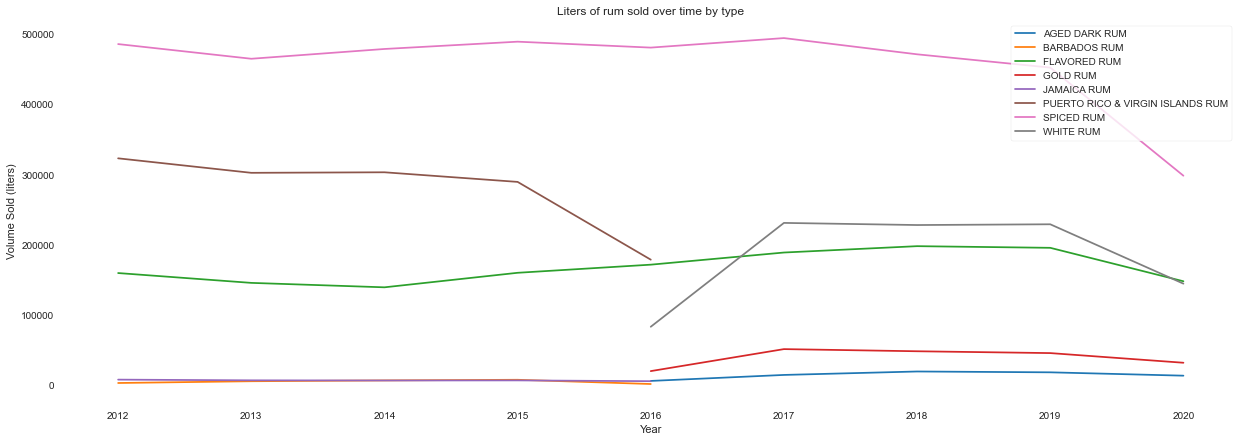

In [338]:
df_time = df_timeseries.pivot(index='year', columns='category name', values='volume sold (liters)')

plt.figure(figsize=(21, 7))

plt.plot(df_time)
plt.legend(df_timeseries['category name'].unique())
plt.title('Liters of rum sold over time by type')
plt.xlabel('Year' )
plt.ylabel('Volume Sold (liters)')
plt.show()

In [225]:
#Dataframes containing individual counts of rum
spiced_rum = rum[rum['category name'] == 'SPICED RUM']
puertorico_rum = rum[rum['category name'] == 'PUERTO RICO & VIRGEN ISLANDS RUM']
flavored_rum = rum[rum['category name']== 'FLAVORED RUM']
jamaica_rum = rum[rum['category name'] == 'JAMAICA RUM']
barbados_rum = rum[rum['category name'] == 'BARBADOS RUM']
white_rum = rum[rum['category name'] == 'WHITE RUM']
gold_rum = rum[rum['category name'] == 'GOLD RUM']
aged_dark_rum = rum[rum['category name'] == 'AGED DARK RUM']

In [210]:
#Rum was sold in every store in the dataset
print(rum['store number'].nunique())
print(df_map['store number'].nunique())

178
178


In [340]:
# # Plot of rum sales by city

# fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
# fig.subplots_adjust(hspace=0.8)

# spiced_rum['county'].agg('sum').sort_index().plot(ax=axes[0],kind='bar',title='rum')
# puertorico_rum['county'].agg('sum').sort_index().plot(ax=axes[1],kind='bar',title='iowa')
# flavored_rum['county'].agg('sum').sort_index().plot(ax=axes[2],kind='bar',title='hi')
# #jamaica_rum['county'].value_counts().sort_index().plot(ax=axes[3],kind='bar',title='iowa')
# #barbados_rum['county'].value_counts().sort_index().plot(ax=axes[4],kind='bar',title='rum')
# #white_rum['county'].value_counts().sort_index().plot(ax=axes[5],kind='bar',title='iowa')
# #gold_rum['county'].value_counts().sort_index().plot(ax=axes[6],kind='bar',title='rum')
# #aged_dark_rum['county'].value_counts().sort_index().plot(ax=axes[7],kind='bar',title='iowa')

In [ ]:
#Plot of rum sales by store


In [212]:
#This is how much rum was sold in city of interest: Davenport
len(rum[rum['city'] == 'DAVENPORT'])

45109